<a href="https://colab.research.google.com/github/npr99/PlanningMethods/blob/master/PLAN604_Descriptive_Statistics_2020CensusTracts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application of Descriptive Statistics: Finding US Census Tract Outliers (2020 Census)
 
---
This Google Colab Notebook provides a complete workflow (sequence of steps from start to finish) that will allow you to explore [US Census Tracts](https://www.census.gov/glossary/#term_Censustract?term=Tract). 
 
A census tract is a statistical subdivision of a county, with around 4,000 people and 1,600 housing units. This boundary may change with each decennial census (every 10 years). Census tract population size provides an application for understanding descriptive statistics such as outliers. Outliers are observations (census tracts) that fall outside of the normal distribution. These might be census tracts with no population or very large populations. 
 
This notebook will demonstrate how to read in data from the US Census website. Clean the data for use in this statistical software environment (python). Explore the data using histograms and descriptive statistics and mapping. This program brings together publicly available data, US Census geography, and descriptive statistics. 
 
This notebook assumes that you have some basic experience with Google Colab and running blocks of code. Users of this notebook do not need to have any python programming background. A basic introduction and curiosity about descriptive statistics and US Census geography is helpful.

## Step 1: Obtain Data with Census API

The following section sets up and reads in data from the Census API. For more details on using Census API in Google Colab for Urban Planning see:

> Gu, Donghwan, and Rosenheim, Nathanael. *Demographic Analysis Workflow using Census API  in Jupyter Notebook: 1990-2000 Population Size and Change.* Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2020-07-30. https://doi.org/10.3886/E120381V1

> Goodman, Cooper, Rosenheim, Nathanael, Day, Wayne, Gu, Donghwan, and Korukonda, Jayasaree. *Population Distribution Workflow using Census API in Jupyter Notebook: Dynamic Map of Census Tracts in Boone County, KY, 2000.* Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2020-07-31. https://doi.org/10.3886/E120382V1

For this notebook we will obtain data from the Census API in the fewest number of lines.


In [1]:
# Python packages required to read in and Census API data
import requests ## Required for the Census API
import pandas as pd # For reading, writing and wrangling data

## What does the next block of code do?
The following block of code does three things:
#### 1. Obtain data from the Census API
The first line requests data from the Census API (`https:// api.census.gov / data`). [Available APIs](https://www.census.gov/data/developers/data-sets/decennial-census.html)

From the 2020 Decennial Census (`/ 2020 / dec/`), redistricting data Public Law (PL 94-171) (`PL`), which means the [short form](https://www.census.gov/programs-surveys/decennial-census/technical-documentation/questionnaires.2020_Census.html). 

The Census API needs three parameters (`params={`) in order to find the correct data for the right geography.
1.   `'get' :` the following [variables](https://api.census.gov/data/2020/dec/pl/variables.html):
> Total Housing Units (`H1_001N`) and Total Population (`P1_001N`)
2.   `'for' : ` the following Census Geography 
> Census tracts (`'tract:*'`)
3.   `'in' : ` the following state
> Texas (`'state:48'`)

You can actually see the same data by going to this weblink:

https://api.census.gov/data/2020/dec/pl?get=H1_001N,P1_001N&for=tract:*&in=state:48

#### 2. Clean the data (convert from json to pandas dataframe)
After the `requests.get` command gets the data from api.census.gov, the data is stored in the varaible names `apijson`. The variable name indicates the data source (`api`) and the file type (`json`). [`JSON`](https://www.json.org/json-en.html) (pronounced JAY-son) is a format, like [CSV](https://www.kaggle.com/rtatman/an-intro-to-json-vs-csv).

#### 3. Explore the data (view the first 5 rows of the data)
The last two lines convert the `json` file into a `pandas` [dataframe](https://towardsdatascience.com/pandas-dataframe-a-lightweight-intro-680e3a212b96). The last line tells Google Colab to display the first 5 rows of the dataframe `tractdf`.

In [2]:
apijson = requests.get('https://api.census.gov/data/2020/dec/pl',
                       params={'get': 'H1_001N,P1_001N',
                               'for': 'tract:*',
                                'in': 'state:48'})
# Convert the requested json into pandas dataframe
tractdf = pd.DataFrame(columns=apijson.json()[0], data=apijson.json()[1:])
tractdf.head()

,H1_001N,P1_001N,state,county,tract
0,3166,5354,48,029,181004
1,2419,4251,48,029,181005
2,2771,5818,48,029,181100
3,2197,4844,48,029,181200
4,2444,4290,48,029,181301


The parameters for the Census API can be modified to request data for other Census Surveys, variables, geographies, and states.
For more information on Census API:
*   [Census Data API User Guide](https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf)
*   [List of available Census APIs](https://www.census.gov/data/developers/data-sets/decennial-census.2010.html)
*   [A list of variables available just from the 2010 short form](https://api.census.gov/data/2010/dec/sf1/variables.html)
*   [A list of State FIPS codes](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696)

## Step 2: Clean Data
Data cleaning is an important step in the data science process. This step is often the hardest and most time consuming. The follow section provides three examples of data cleaning. 
1. Set the variable type
2. Label variables
3. Add a unique id

### 2.1 Set the variable type

The data obtained from the Census API is not in the right format. For example, right now the statistical software does not recognize the H1_001N variable is a discrete quantitative number.

If we try to look at the descriptive statistics (min, max, mean, median etc.) for the total housing units by census tract the describe command does not work.

In [3]:
tractdf['H1_001N'].describe()

count     6896
unique    2439
top          0
freq        28
Name: H1_001N, dtype: object

Converting variables into the correct data type is a regular data cleaning step. The next codeblock changes the variable type to integer using the `astype(int)` command.

In [4]:
tractdf["H1_001N"] = tractdf["H1_001N"].astype(int)
tractdf["P1_001N"] = tractdf["P1_001N"].astype(int)

Now that the statistical software knows that the variables for total housing units and population are integers (discrete numbers) we can use the `describe` command to get the descriptive statistics. 

### 2.2 Label variables
Variable labels are an important form of metadata (data about the data). In this example `H1_001N` is the variable name and the variable label is `Total Housing Units`. In python we can rename the variable using the variable label. This will make it easier to remember what the data is about.

In [5]:
tractdf = tractdf.rename(columns={"H1_001N": "Total Housing Units", 
                                  "P1_001N": "Total Population"})
tractdf.head()

,Total Housing Units,Total Population,state,county,tract
0,3166,5354,48,029,181004
1,2419,4251,48,029,181005
2,2771,5818,48,029,181100
3,2197,4844,48,029,181200
4,2444,4290,48,029,181301


### 2.3 Add a unique id
A unique id is an important part of a good data file. The current list of census tracts does not have a unique id, but we can create one using the state, county, and tract variables. For US Census Geographies this code is called the  [Geographic Identifier (GEOID)](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html).

The `describe` command provides a count of the number of unique values for the state, county, and tract variables.

In [6]:
tractdf[['state','county','tract']].describe()

,state,county,tract
count,6896,6896,6896
unique,1,254,5136
top,48,201,950100
freq,6896,1115,92


Notice that there is 1 unique value for state (all the census tracts are in the same state). There are 254 unique values for county (there are 254 counties in Texas), and there are 5,136 unique values for the tract code, but there are 6,896 total tracts. The count of unique values needs to be equal to the total count. (Note that for 2010 there were 5,265 tracts in Texas).

The three variables state, county, and tract may look like numbers, but they are actually not quantitative variables, they are actually categorical and nominal (values do not have a "high" or "low" end). Python will treat these variables like strings or letters. The next code block combines the three variables into a new variable called GEOID. 

In [7]:
tractdf['GEOID'] = tractdf['state']+tractdf['county']+tractdf['tract']
tractdf['year'] = '2020'
tractdf.head()

,Total Housing Units,Total Population,state,county,tract,GEOID,year
0,3166,5354,48,029,181004,48029181004,2020
1,2419,4251,48,029,181005,48029181005,2020
2,2771,5818,48,029,181100,48029181100,2020
3,2197,4844,48,029,181200,48029181200,2020
4,2444,4290,48,029,181301,48029181301,2020


GEOID now uniquely identifies each census tract in the data.

In [8]:
tractdf['GEOID'].describe()

count            6896
unique           6896
top       48029181004
freq                1
Name: GEOID, dtype: object

Notice after describing the variable `GEOID` that the total count equals the total number of unique observations. When the count = unique the variable is a unique id.

## Step 3: Describe the data
Descriptive methods summarize the data. Descriptive statistics summarize data with numbers, tables, and graphs. The following block of code creates and formats a table using the `describe` function. The table provides eight descriptive statistics. These include the count, the mean, the standard deviation (std), the minimum (min), the lower quartile (25%), the median (50%), the upper quartile (75%), and the maximum (max).

In [9]:
table1 = tractdf[['Total Housing Units','Total Population']].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 1. Descriptive statistics for total housing units " + \
              "and population by census tract in Texas, 2020."
table1 = table1.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table1

,count,mean,std,min,25%,50%,75%,max
Total Housing Units,"6,896","1,681",734,0,"1,187","1,598","2,063","10,021"
Total Population,"6,896","4,226","2,026",0,"2,860","3,957","5,194","30,199"


### 3.1 Summary of descriptive statistics for Census Tracts in Texas, 2010.

In 2020 Texas had 6,896 Census Tracts. The average tract had 1,681 housing units and 4,226 people. These values are slightly higher than the expected 1,600 housing units and 4,000 people. The median values are smaller that then mean, therefore the distribution is skewed to the right, with very large outliers pulling the mean to the right. The standard deviation is 734 for total housing units and 2,026 for the total population. The largest census tract in Texas had 30,199 people.

Where is the largest Census Tract? If you know the GEOID you can use data.census.gov to find the largest Census Tract. In python we can use the Pandas .loc (locate) function to find observations with a specific value.

In [10]:
tractdf.loc[tractdf['Total Population'] > 30000]

,Total Housing Units,Total Population,state,county,tract,GEOID,year
6409,10021,30199,48,029,172002,48029172002,2020


With the GEOID the data.census.gov link to the data is 
https://data.census.gov/cedsci/table?g=1400000US48029172002&tid=DECENNIALPL2020.P1

The Census Reporter Link for the same tract is 
https://censusreporter.org/profiles/14000US48029172002-census-tract-172002-bexar-tx/

Notice that the link to the website includes the GEOID. 

Also notice that Census Reporter has been updated to use 2020 Census geographies. These are sometimes different between decennial Census geographies. In the case of Census Tract 48029172002 the geographies appear to be the same.


### 3.2 Histograms and Boxplots
Histograms and boxplots are tools to help describe the distribution (range and variability) in data. 

In python the `matplotlib` package provides commands to create graphs.

In [11]:
import matplotlib.pyplot as plt # required for graphs (histogram, boxplot)

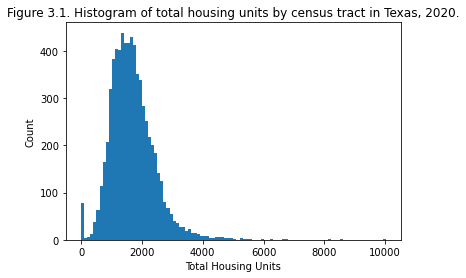

In [12]:
plt.hist(tractdf['Total Housing Units'], bins=100)
plt.title("Figure 3.1. Histogram of total housing units by census tract in Texas, 2020.")
plt.xlabel('Total Housing Units')
plt.ylabel('Count')
plt.show()

Figure 3.1 provides a graph of the frequency distribution for the total housing units. Each interval has a bar over it, with a height representing the number of observations in that interval. The distribution "peaks" around the mean value of 1,681.

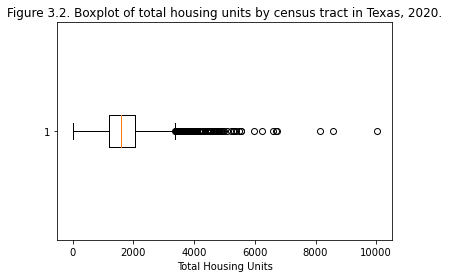

In [13]:
plt.boxplot(tractdf['Total Housing Units'], vert=False)
plt.title("Figure 3.2. Boxplot of total housing units by census tract in Texas, 2020.")
plt.xlabel('Total Housing Units')
plt.show()

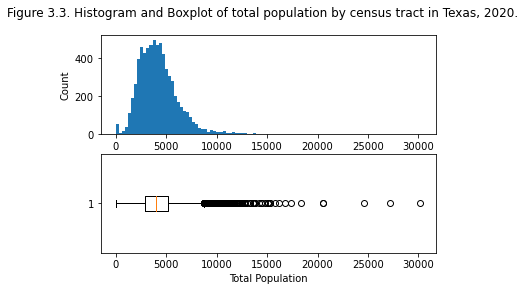

In [14]:
# This block of code combines two plots into one image
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Figure 3.3. Histogram and Boxplot of total population by census tract in Texas, 2020.')
ax1.hist(tractdf['Total Population'], bins=100)
ax1.set_ylabel('Count')
ax2.boxplot(tractdf['Total Population'], vert=False)
ax2.set_xlabel('Total Population')
plt.show()

#### 3.2.1 Discussion of histograms and boxplots
Figure 3.1 is a histogram of total housing units in each census tract in Texas. Notice that the distribution is skewed to the right.

Figure 3.2 is a boxplot of the same data that is in Figure 3.1. The box plot uses the descriptive statistics to show the variability of the data. The boxplot highlights that many census tracts are outliers.

Figure 3.3 combines a histogram with the boxplot for the total population in each census tract in Texas. Notice that the boxplot highlights the median value, around 4,226 people.

### 3.3 Scatter Plots, Correlations, and Regression

You can construct scatter plots and find correlations and regression prediction equations using the following functions:

`scatter` from matplotlib

`corr` from pandas

`OLS` from the statsmodels package

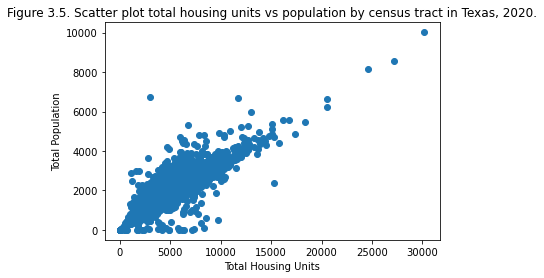

In [15]:
# Scatter Plot
plt.scatter(tractdf['Total Population'], tractdf['Total Housing Units'])
plt.title('Figure 3.5. Scatter plot total housing units vs population by census tract in Texas, 2020.')
plt.xlabel('Total Housing Units')
plt.ylabel('Total Population')
plt.show()

### 3.3.1 Discussion of scatter plots

Figure 3.5 is an example of a scatterplot, that compares the relationship between total housing units and total population. Total housing units are plotted on the horizontal axis. Total population are plotted on the vertical axis. The figure plots the 6,896 census tracts as 6,896 points. The scatter plot shows that census tracts with more housing units have higher populations.

In [16]:
# Correlation
tractdf[['Total Population','Total Housing Units']].corr()

,Total Population,Total Housing Units
Total Population,1.000000,0.852102
Total Housing Units,0.852102,1.000000


### 3.3.2 Discussion of correlation
Correlation describes how strong the association is between two varaibles. For total population and total housing units the correlation is 0.85. The postive value means that total population tends to go up as total housing units goes up. 

In [17]:
# Regression Prediction
from sklearn.linear_model import LinearRegression

# Data must be reshaped to work with the Linear Regression Model
x = tractdf['Total Housing Units'].values.reshape(-1,1)
y = tractdf['Total Population'].values.reshape(-1,1)

# Fit and summarize OLS model
model = LinearRegression()  
model.fit(x, y) 

LinearRegression()

In [18]:
#To retrieve the intercept:
intercept = model.intercept_
print(intercept)

[275.38448301]


In [19]:
#For retrieving the slope:
slope = model.coef_
print(slope)

[[2.35099593]]


### 3.3.3 Discussion of regression
Regression analysis describes is a useful tool for describing the trend between variables. The example above treats total population as the response variable (y) and total housing units as the explanatory variable (x). The equation assumes that the number of housing units explains the number of people. The results of the regression analysis predict that for each additional housing unit in a census tract the population will increase by 2.35 people.

### 3.4 Finding outliers
The following section provides the steps needed to identify potential outliers within the data. This section will look at two approaches. First, observations that fall more than 1.5 times the interquartile range (IQR) above the upper quartile will be identified. Second, observations with a z-score greater than 3 will be identified.

#### 3.4.1 IQR Outliers
The `quantile` function provides a means to determine the the lower and upper quartiles. Quartiles (think quarters) divide the data into four equal parts. The lower quartile is the value that is greater than 25% of the data. The upper quartile is the value that is greater than 75% of the data. The interquartile range (IQR) is the difference between the upper and lower quartiles.

Notice that with the function `quartile` .25 is the lower quartile and .75 is the upper quartile.

In [20]:
lower_quartile_pop = tractdf['Total Population'].quantile(.25)
upper_quartile_pop = tractdf['Total Population'].quantile(.75)
IQR_pop = upper_quartile_pop - lower_quartile_pop
print('The Interquartile range is ',IQR_pop)

The Interquartile range is  2334.25


Using the IQR method, the following code defines the upper and lower bounds for the total population variable. The upper bound is the upper quartile plus 1.5 times the IQR. The lower bound is the lower quartile minus 1.5 times the IQR.

This code is a good example of how to create and save a number as a variable to be used later in the program. The code uses the variables `IQR_pop`,  `upper_quartile_pop`, and `lower_quartile_block` created in the previous code block to create the variables `upper_bound_pop` and `lower_bound_pop`.

The code style attempts to be "self documenting" with variable names that provide context clues to the purpose of the variable.

In [21]:
# How many people need to be in a census tract to be an outlier?
upper_bound = upper_quartile_pop + 1.5*IQR_pop
lower_bound = lower_quartile_pop - 1.5*IQR_pop
print('If a census tract has more than',upper_bound,'people it is an outlier.')
print('If a census tract has less than',lower_bound,'people it is an outlier.')

If a census tract has more than 8695.625 people it is an outlier.
If a census tract has less than -641.375 people it is an outlier.


The code below uses the `loc` function to find observations that fall outside the upper and lower bounds.

In [24]:
# Create a new variable to identify outliers
tractdf['IQR Outlier Total Population'] = 0
tractdf.loc[tractdf['Total Population'] >upper_bound, 
            'IQR Outlier Total Population'] = 1
tractdf.loc[tractdf['Total Population'] < lower_bound, 
            'IQR Outlier Total Population'] = 1
tractdf['IQR Outlier Total Population'].describe()

count    6896.000000
mean        0.026827
std         0.161590
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: IQR Outlier Total Population, dtype: float64

A unique quality of binary variables is that the mean of the variable provides the proportion of the data that has the attribute. In the case of census tracts, 0.026 or 2.6% of observations would be considered outliers.

##### 3.4.1.1 Discussion of IQR outliers
Now that we have identified which census tracts are outliers based on the IQR definition, we can see that there are 185 census tracts that are have a population greater than 8,696.

In [25]:
table2 = tractdf.loc[tractdf['IQR Outlier Total Population'] == 1].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 2. Descriptive statistics for IQR outlier census tracts in Texas, 2020."
table2 = table2.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table2

,count,mean,std,min,25%,50%,75%,max
Total Housing Units,185,"3,729","1,078",506,"3,064","3,564","4,090","10,021"
Total Population,185,"11,124","3,014","8,698","9,414","10,188","11,727","30,199"
IQR Outlier Total Population,185,1,0,1,1,1,1,1


#### 3.4.2 Z-Score Outliers
Another way to identify outliers is by looking at the z-score, or the number of standard deviations an observation falls from the mean. 
The formula for z-score is

>$z = \frac{observation - mean}{{standard deviation}}$

If a census tracts z-score is greater than or less than 3 it would be considered an outlier.


In [24]:
mean = tractdf['Total Population'].mean()
standard_deviation = tractdf['Total Population'].std()
print('The average census tract had a total population of', mean)
print('The standard deviation for the distribution was', standard_deviation)

The average census tract had a total population of 4226.436339907193
The standard deviation for the distribution was 2025.5038926528953


In [25]:
tractdf['Total Population Z-score'] = (tractdf['Total Population'] - mean)/standard_deviation
tractdf['Total Population Z-score'].describe()

count    6.896000e+03
mean    -2.025320e-17
std      1.000000e+00
min     -2.086610e+00
25%     -6.746155e-01
50%     -1.330219e-01
75%      4.778138e-01
max      1.282277e+01
Name: Total Population Z-score, dtype: float64

In [26]:
# Create a new variable to identify outliers
tractdf['Z-score Outlier Total Population'] = 0
tractdf.loc[abs(tractdf['Total Population Z-score']) > 3, 
            'Z-score Outlier Total Population'] = 1
tractdf['Z-score Outlier Total Population'].describe()

count    6896.000000
mean        0.012906
std         0.112877
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Z-score Outlier Total Population, dtype: float64

In [27]:
table3 = tractdf.loc[tractdf['Z-score Outlier Total Population'] == 1].describe().T
varformat = "{:,.0f}" # The variable format adds a comma and rounds up
table_title = "Table 3. Descriptive statistics for Z-score outlier census tracts in Texas, 2020."
table3 = table3.style.set_caption(table_title).format(varformat).set_properties(**{'text-align': 'right'})
table3

,count,mean,std,min,25%,50%,75%,max
Total Housing Units,89,"4,318","1,197","2,366","3,606","4,090","4,670","10,021"
Total Population,89,"12,988","3,464","10,308","10,849","11,980","13,644","30,199"
IQR Outlier Total Population,89,1,0,1,1,1,1,1
Total Population Z-score,89,4,2,3,3,4,5,13
Z-score Outlier Total Population,89,1,0,1,1,1,1,1


##### 3.4.1.2 Discussion of Z-score outliers
Now that we have identified which census tracts are outliers based on the Z-scores definition, we can see that there are only 70 census tracts that are are more than 3 standard deviations from the mean. These census tracts have populations greater than 12,134 people. Notice that all of the z-score outliers are also IQR outliers.

## Step 4: Save results
The final step in this notebook is to save the results as a csv file. In Google Colab the file will be saved into a temporary folder and can be found by clicking on the file icon to right of the window. The file can be downloaded to your computer.

In [28]:
tractdf.to_csv('tract_outliers_texas2020.csv')

# Just in case.... Python Version Information
Python is an open source programming language, which means that it is not owned or maintained by a private company. Programmers create packages (collections of programs) and make them publicly available. 
The versions of python and packages can change frequently. Sometimes, when a version changes the code also needs to change. The program above was based on the following versions:
* Python Version      3.7.12 (default, Sep 10 2021, 00:21:48) 
* pandas version:     1.1.5
* requests version:      2.23.0
* matplotlib: 3.2.2

If there are errors in the code, it is most likely due to changes in the versions.

In [29]:
# Import packages
import sys # For checking version of python for replication
import matplotlib # required to see the version of matplotlib

# It is important to know the versions being used - this will help with debugging
print("Python Version     ", sys.version)
print("pandas version:    ", pd.__version__)
print("requests version:     ", requests.__version__)
print("matplotlib: ", matplotlib.__version__)

Python Version      3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas version:     1.1.5
requests version:      2.23.0
matplotlib:  3.2.2
